In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import ensemble
from sklearn import model_selection
from sklearn import neighbors
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv('ENB_data.csv')
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


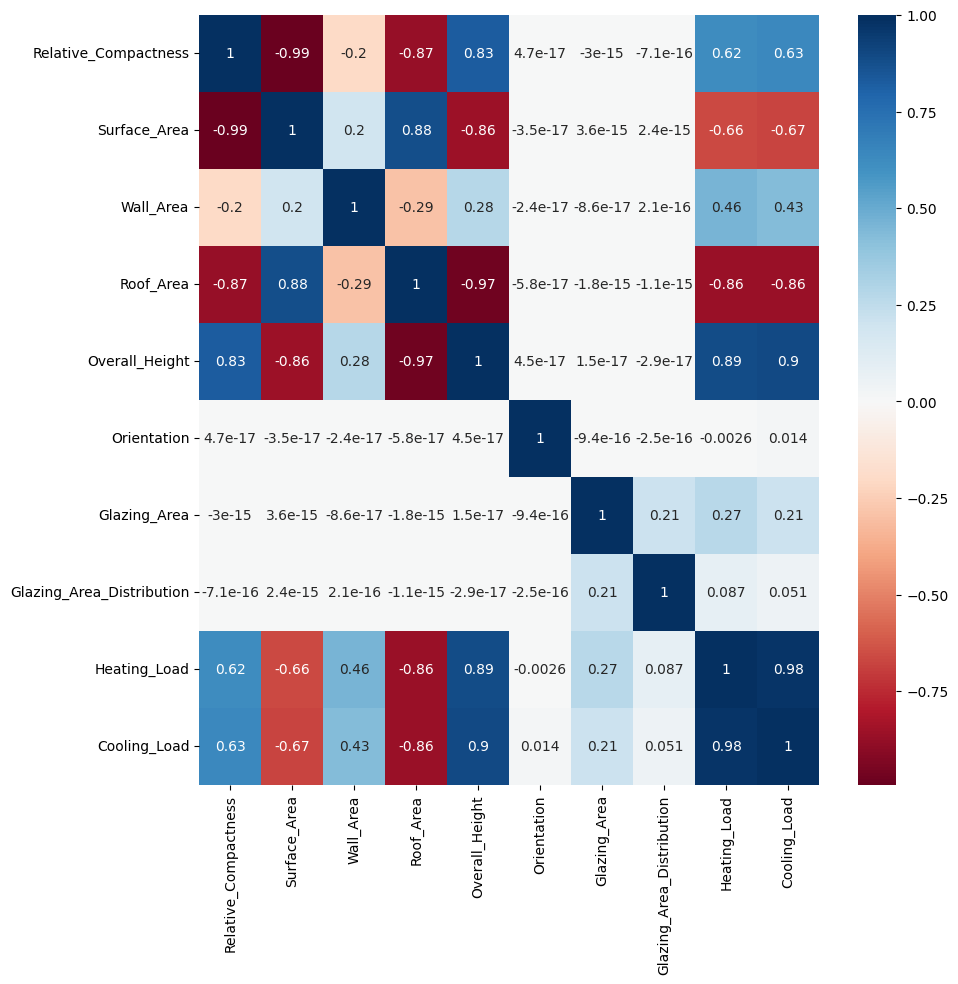

In [2]:

import seaborn as sns

plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True, cmap = 'RdBu', center=0);

In [4]:
total_charges=df['Heating_Load'] + df['Cooling_Load']
df['total_charges'] = total_charges
df['charges_classes'] = pd.qcut(df.total_charges, labels = [0,1,2,3], q=4)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,total_charges,charges_classes
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,36.88,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,36.88,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,36.88,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,36.88,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,49.12,2


In [5]:
data = df[df.columns[0:8]]
target=df.charges_classes
X_train, X_test, y_train, y_test=train_test_split(data, target, test_size=0.20)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [6]:
#np.arange(2,51)
clf_1=neighbors.KNeighborsClassifier()
parameters_knn={'n_neighbors' : np.arange(2,51)}
grid_clf_1 = model_selection.GridSearchCV(estimator=clf_1, param_grid=parameters_knn)
grid_knn=grid_clf_1.fit(X_train_scaled, y_train)
print('The hyperparameters retained are', grid_clf_1.best_params_, "\n")

y_pred_knn=grid_clf_1.predict(X_test_scaled)
cm=pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])

print(cm, "\n")

score_knn=grid_clf_1.score(X_test_scaled, y_test)

print('The score for knn model is',score_knn)



The hyperparameters retained are {'n_neighbors': 3} 

Predicted   0   1   2   3
Actual                   
0          42   4   0   0
1           2  30   3   0
2           0   0  36   4
3           0   0   3  30 

The score for knn model is 0.8961038961038961


In [7]:
clf_2=svm.SVC ()
parameters_svm={'C':[0.1 , 1 , 10 , 50], 'kernel':['rbf', 'linear']}
grid_clf_2 = model_selection.GridSearchCV(estimator=clf_2, param_grid=parameters_svm)
grid_svm=grid_clf_2.fit(X_train_scaled, y_train)
#grid_clf_2.best_params_
print('The hyperparameters retained are', grid_clf_2.best_params_, '\n')

y_pred_svm=grid_clf_2.predict(X_test_scaled)
cm=pd.crosstab(y_test, y_pred_svm, rownames=['Actual'], colnames=['Predicted'])

print(cm, '\n')

score_svm=grid_clf_2.score(X_test_scaled, y_test)

print('The score for svm model is',score_svm)


The hyperparameters retained are {'C': 50, 'kernel': 'rbf'} 

Predicted   0   1   2   3
Actual                   
0          43   3   0   0
1           1  33   1   0
2           0   1  35   4
3           0   0   0  33 

The score for svm model is 0.935064935064935


In [8]:
clf_3=ensemble.RandomForestClassifier()
parameters_rf={'max_features': ["sqrt", "log2", None],'min_samples_split': np.arange(2,31)}
grid_clf_3 = model_selection.GridSearchCV(estimator=clf_3, param_grid=parameters_rf)
grid_rf=grid_clf_3.fit(X_train_scaled, y_train)
grid_clf_3.best_params_
print('The hyperparameters retained are', grid_clf_3.best_params_, '\n')

y_pred_rf=grid_clf_3.predict(X_test_scaled)
cm=pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])

print(cm, '\n')

score_rf=grid_clf_3.score(X_test_scaled, y_test)

print('The score for rf model is',score_rf)

The hyperparameters retained are {'max_features': 'log2', 'min_samples_split': 3} 

Predicted   0   1   2   3
Actual                   
0          45   1   0   0
1           2  32   1   0
2           0   0  37   3
3           0   0   0  33 

The score for rf model is 0.9545454545454546


In [9]:
from sklearn.model_selection import GridSearchCV
vc  = VotingClassifier(estimators=[('knn', clf_1), ('svm', clf_2), ('rf', clf_3)], voting='hard')
vc.fit(X_train_scaled, y_train)
y_pred = vc.predict(X_test_scaled)
cm= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm, '\n')

score_vc=vc.score(X_test_scaled, y_test)

print('The score for vc model is',score_vc, '\n')

Predicted   0   1   2   3
Actual                   
0          43   3   0   0
1           1  32   2   0
2           0   0  36   4
3           0   0   0  33 

The score for vc model is 0.935064935064935 

